In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [10]:
df.drop('customerID', axis=1, inplace=True)

In [11]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}))

In [12]:
df = pd.get_dummies(df, drop_first=True)

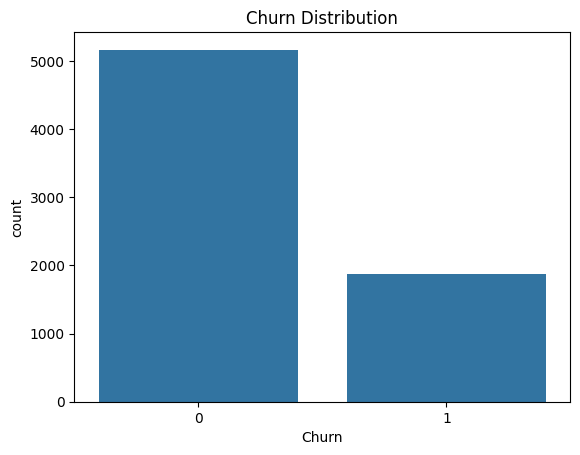

In [13]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

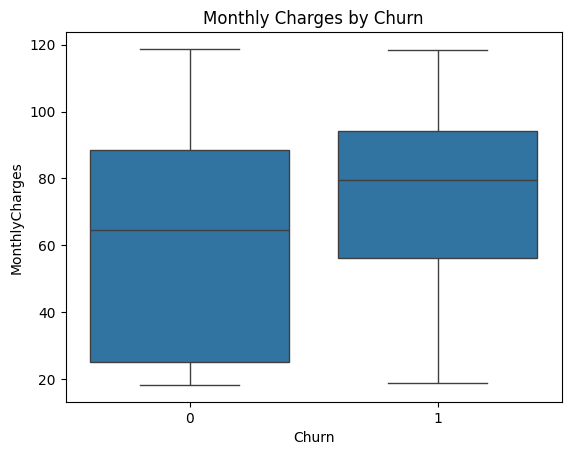

In [14]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

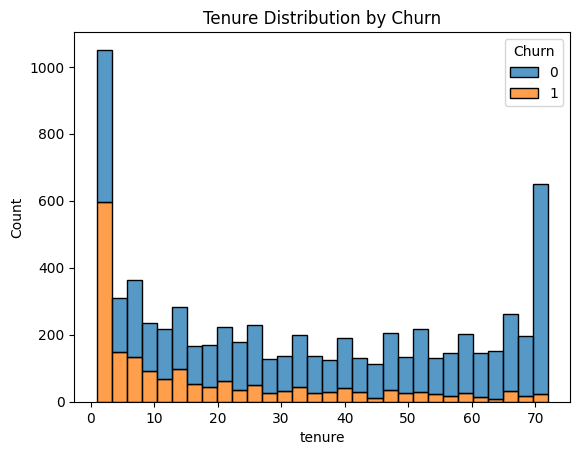

In [15]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure Distribution by Churn")
plt.show()

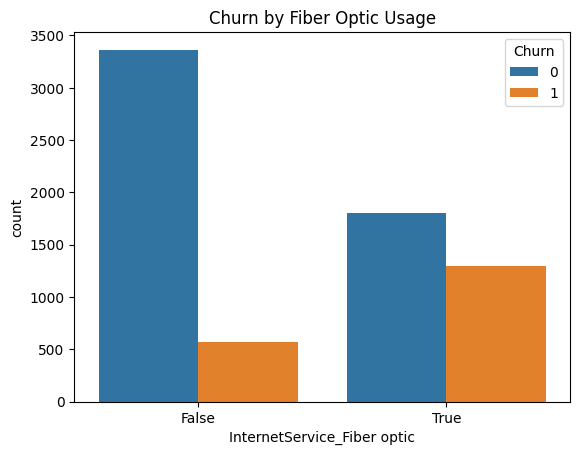

In [16]:
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df)
plt.title("Churn by Fiber Optic Usage")
plt.show()

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred_log = log_model.predict(X_test)

In [23]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7874911158493249

Confusion Matrix:
 [[915 118]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [25]:
ann_model = Sequential()
ann_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6694 - loss: 0.5913 - val_accuracy: 0.7902 - val_loss: 0.4436
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7876 - loss: 0.4449 - val_accuracy: 0.7947 - val_loss: 0.4270
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8082 - loss: 0.4147 - val_accuracy: 0.8053 - val_loss: 0.4199
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4201 - val_accuracy: 0.8053 - val_loss: 0.4177
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8020 - loss: 0.4164 - val_accuracy: 0.8044 - val_loss: 0.4158
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.4160 - val_accuracy: 0.8133 - val_loss: 0.4142
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8117 - loss: 0.3983 - val_accuracy: 0.8080 - val_loss: 0.4132
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.3984 - val_accuracy: 0

In [28]:
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [29]:
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann))

ANN Accuracy: 0.7583511016346838

Confusion Matrix:
 [[872 161]
 [179 195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1033
           1       0.55      0.52      0.53       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.75      0.76      0.76      1407

